In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cPickle as cp
import sys
sys.path.append("../../utils")
from misc_utils import expected_loss

In [2]:
memory_budget = 4096
data_path = "/dfs/scratch0/zjian/lp_kernel/noise_trade_off"

In [3]:
with open(data_path + "/U_" + str(memory_budget) + ".npy", "r") as f:
    U = np.load(f)
with open(data_path + "/S_" + str(memory_budget) + ".npy", "r") as f:
    S = np.load(f)
with open(data_path + "/Y_" + str(memory_budget) + ".npy", "r") as f:
    Y = np.load(f)

In [4]:
def get_closeness(spectrum, spectrum_baseline, lamb):
    return np.linalg.norm(spectrum / (spectrum + lamb) - spectrum_baseline / (spectrum_baseline + lamb) )**2 

def get_log_closeness(spectrum, spectrum_baseline, lamb):
    return np.linalg.norm(np.log(spectrum + lamb) - np.log(spectrum_baseline + lamb) )**2

In [5]:
S_baseline = S[::-1]
dim = S.size
print dim

16367


### verify on cut point

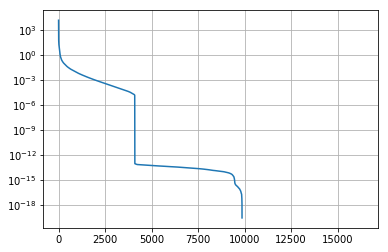

In [6]:
plt.figure()
plt.semilogy(S_baseline)
plt.grid()
plt.show()

### cut off

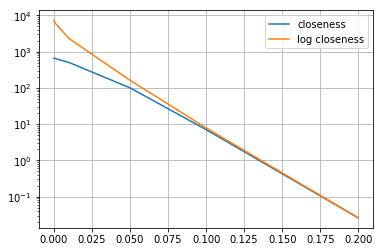

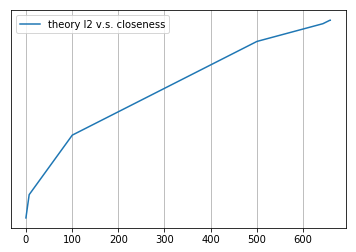

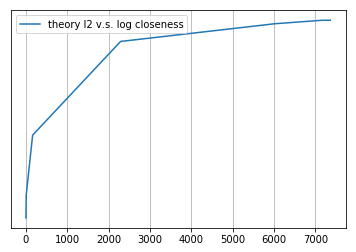

In [50]:
keep_perc_list = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
closeness_list = []
log_closeness_list = []
theory_l2_list = []
lamb = 1e-2
noise = 1e0
for keep_perc in keep_perc_list:
    S_cut = S_baseline.copy()
    S_cut[int(keep_perc * dim):] = 0.0
#     print int(keep_perc * dim)
    closeness_list.append(get_closeness(S_cut, S_baseline, lamb) )
    log_closeness_list.append(get_log_closeness(S_cut, S_baseline, lamb) )
    theory_l2_list.append(expected_loss(lamb, U, S_cut, Y, noise) )
plt.figure()
plt.semilogy(keep_perc_list, closeness_list, label="closeness")
plt.semilogy(keep_perc_list, log_closeness_list, label="log closeness")
# plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
# plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
# plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
plt.grid()
plt.legend()
plt.show()

plt.figure()
# plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
# plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
plt.grid()
plt.legend()
plt.show()
# print closeness_list
# print log_closeness_list
# print theory_l2_list
# print len(closeness_list)
# print len(log_closeness_list)
# print len(theory_l2_list)

noise  0.1 lamb  1e-06


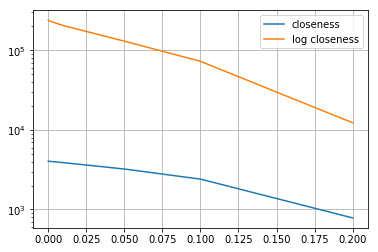

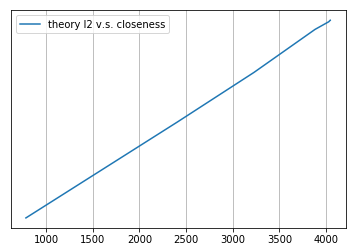

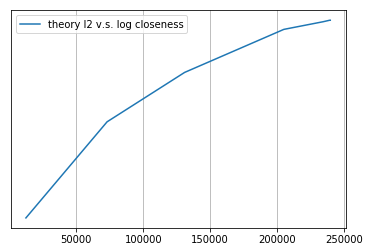

noise  0.1 lamb  1e-05


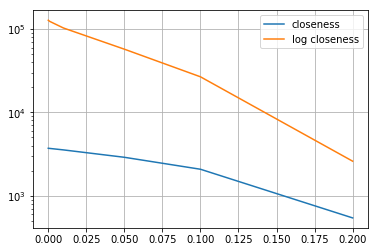

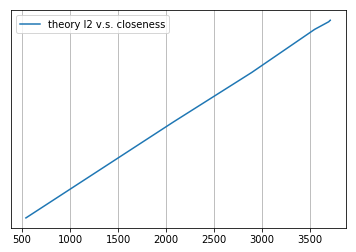

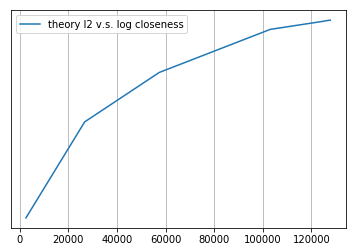

noise  0.1 lamb  0.001


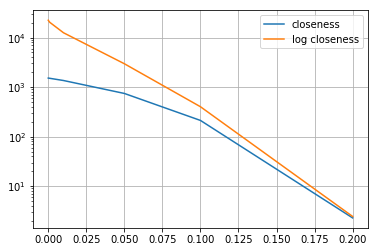

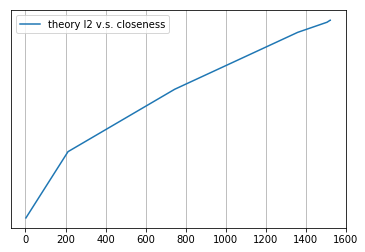

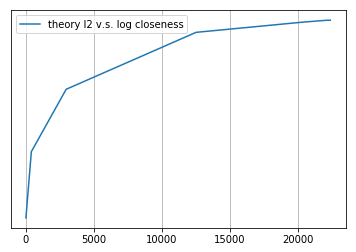

noise  0.1 lamb  0.01


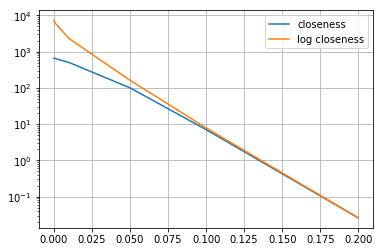

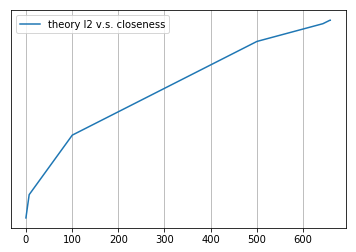

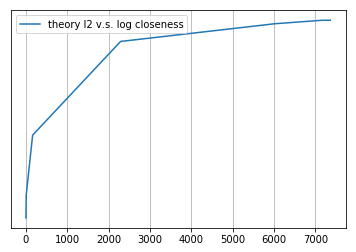

noise  0.1 lamb  0.1


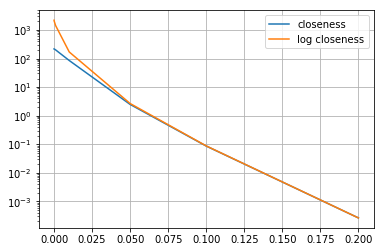

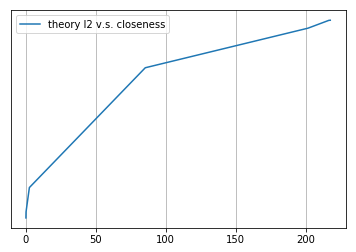

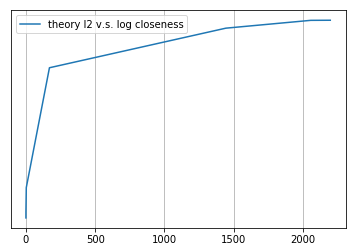

noise  0.1 lamb  1.0


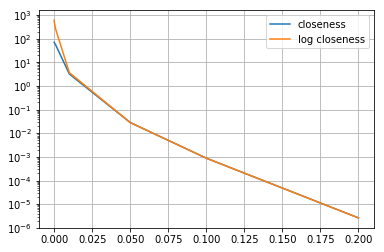

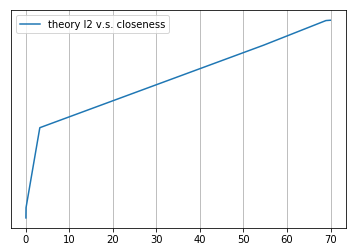

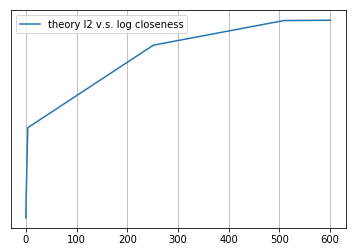

noise  0.1 lamb  10.0


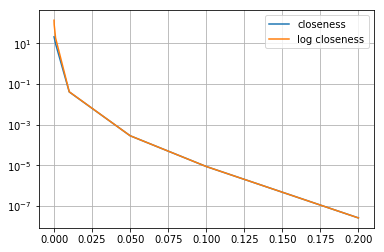

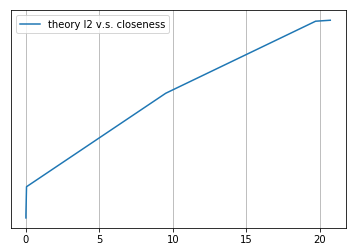

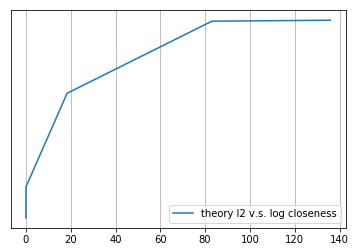

noise  1.0 lamb  1e-06


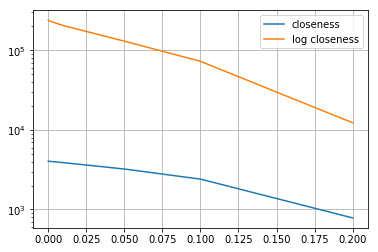

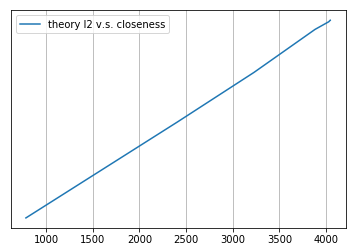

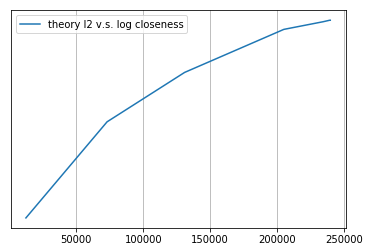

noise  1.0 lamb  1e-05


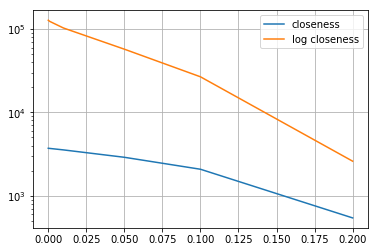

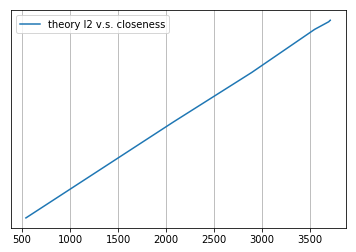

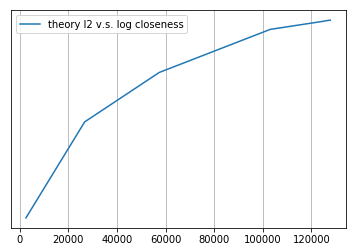

noise  1.0 lamb  0.001


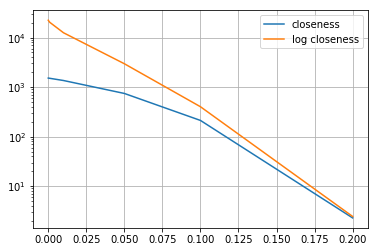

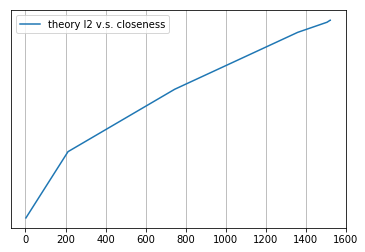

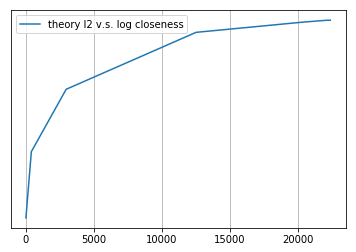

noise  1.0 lamb  0.01


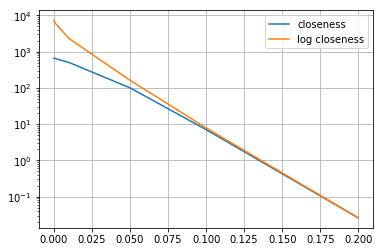

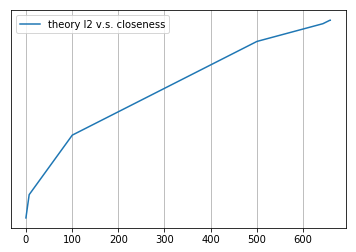

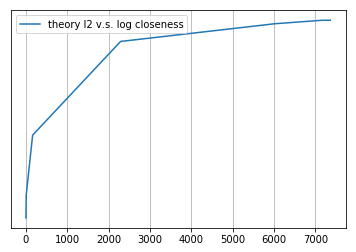

noise  1.0 lamb  0.1


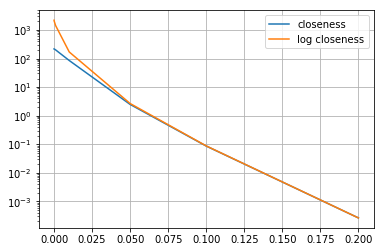

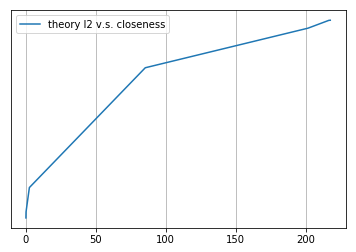

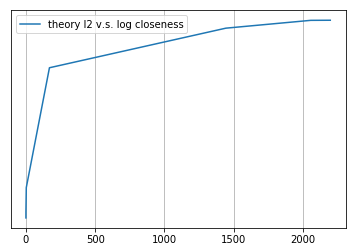

noise  1.0 lamb  1.0


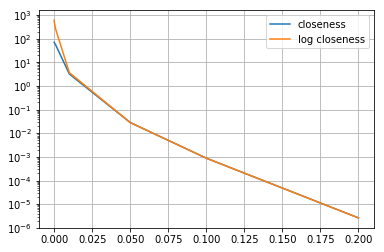

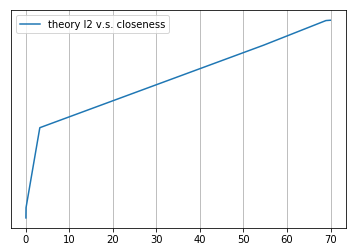

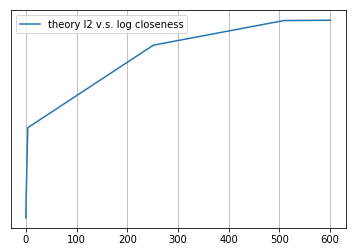

noise  1.0 lamb  10.0


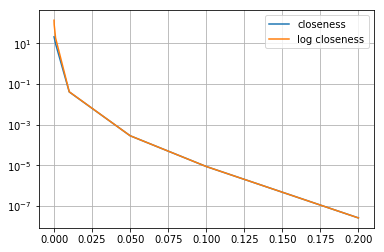

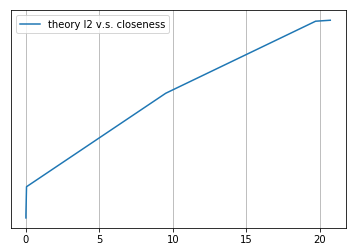

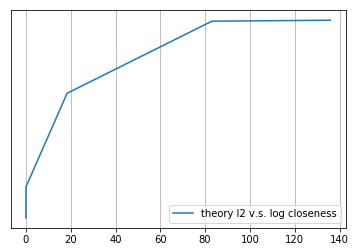

noise  10.0 lamb  1e-06


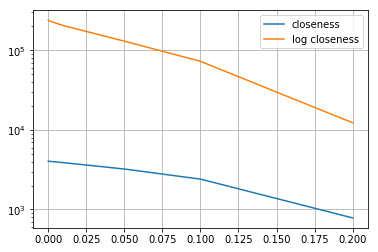

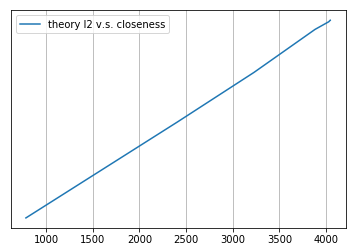

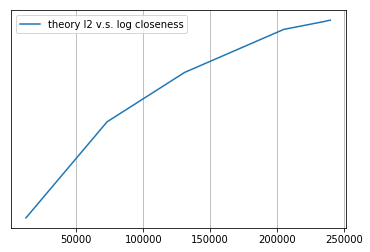

noise  10.0 lamb  1e-05


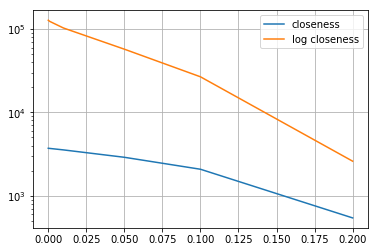

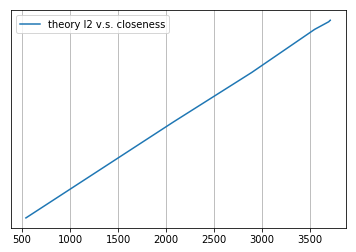

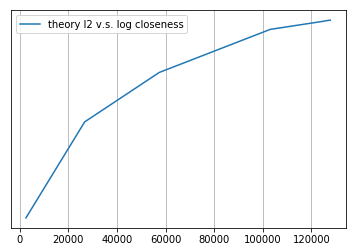

noise  10.0 lamb  0.001


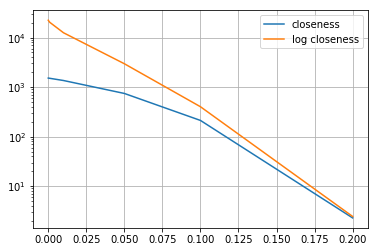

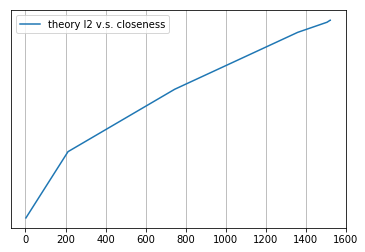

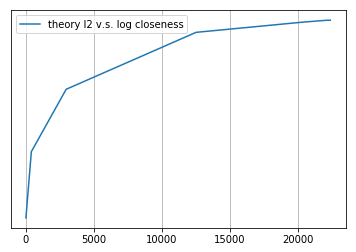

noise  10.0 lamb  0.01


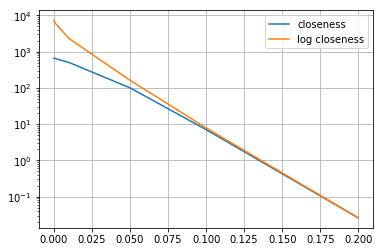

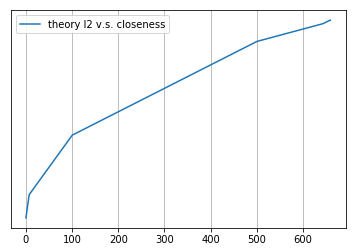

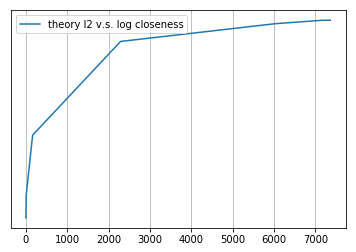

noise  10.0 lamb  0.1


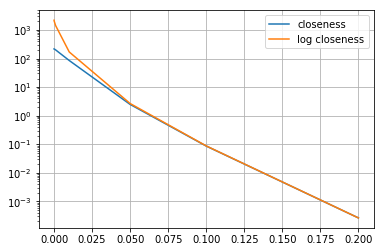

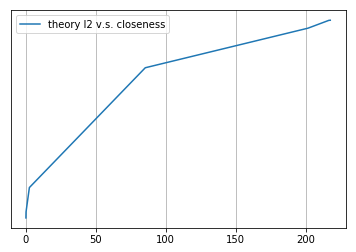

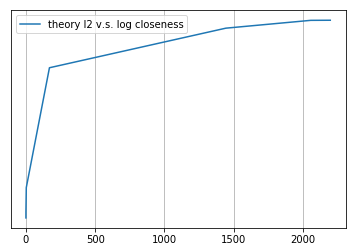

noise  10.0 lamb  1.0


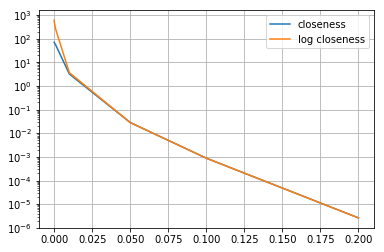

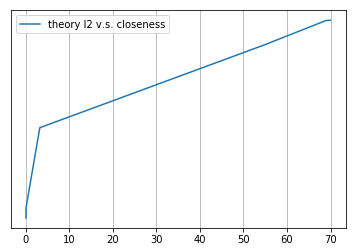

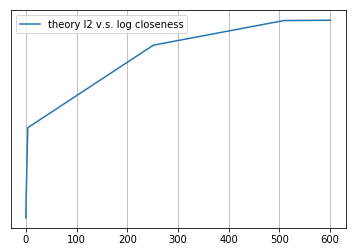

noise  10.0 lamb  10.0


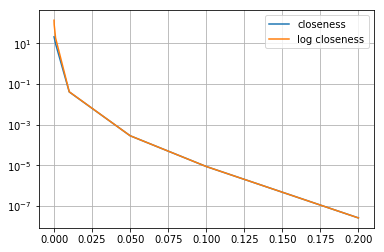

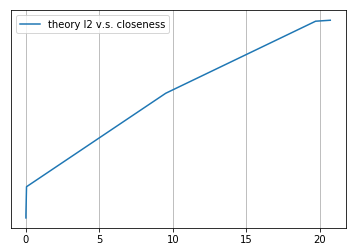

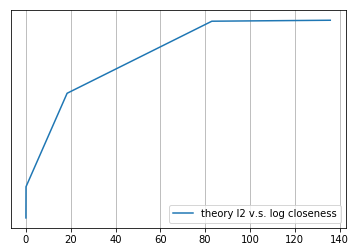

noise  100.0 lamb  1e-06


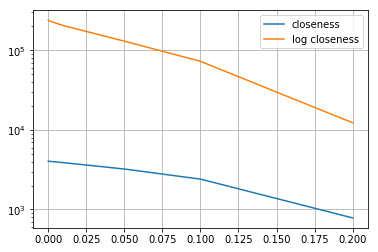

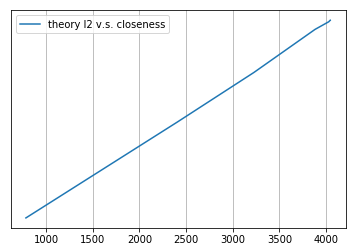

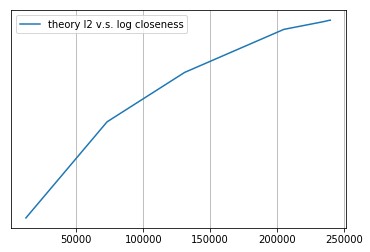

noise  100.0 lamb  1e-05


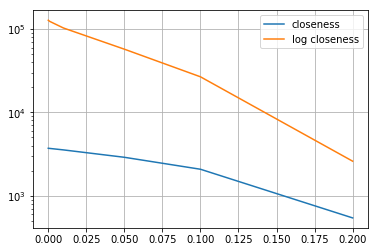

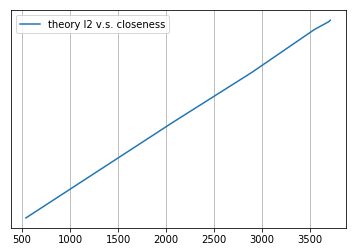

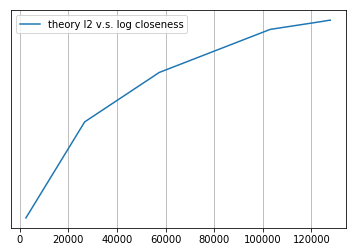

noise  100.0 lamb  0.001


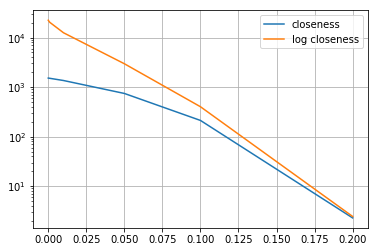

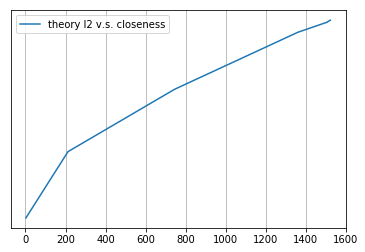

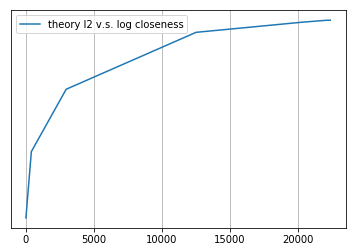

noise  100.0 lamb  0.01


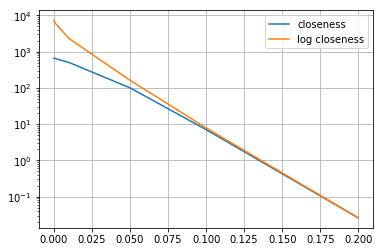

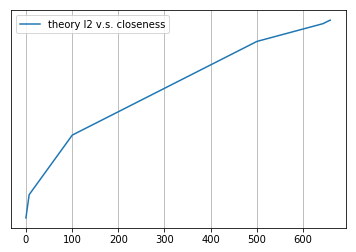

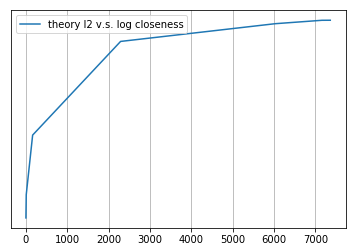

noise  100.0 lamb  0.1


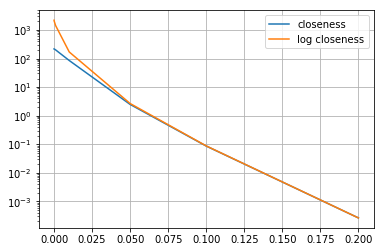

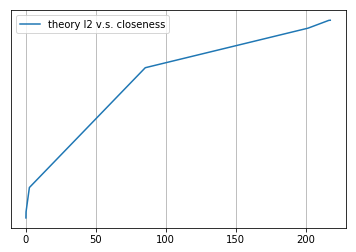

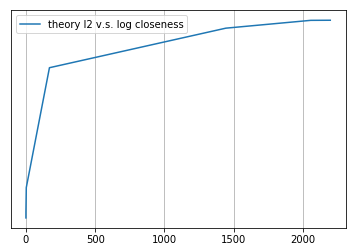

noise  100.0 lamb  1.0


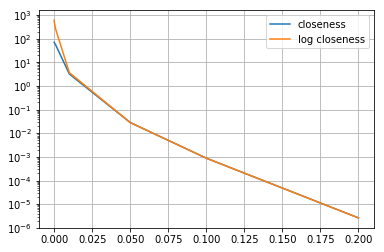

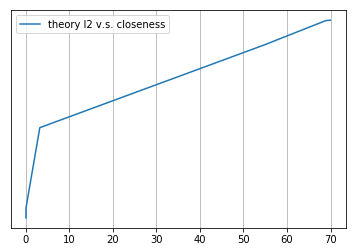

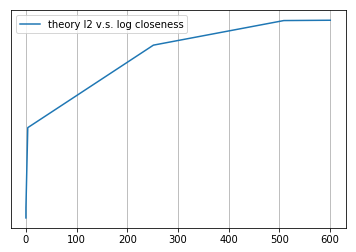

noise  100.0 lamb  10.0


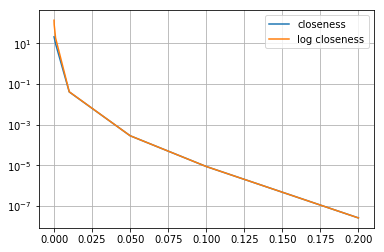

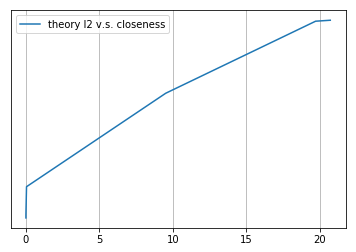

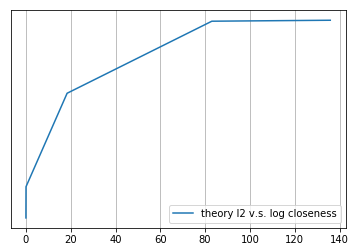

noise  1000.0 lamb  1e-06


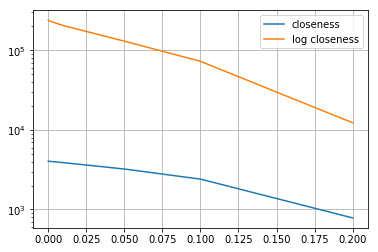

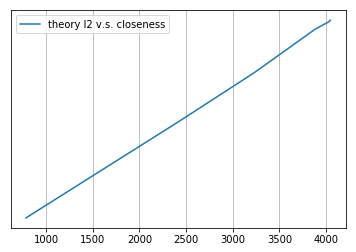

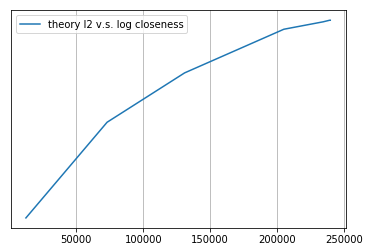

noise  1000.0 lamb  1e-05


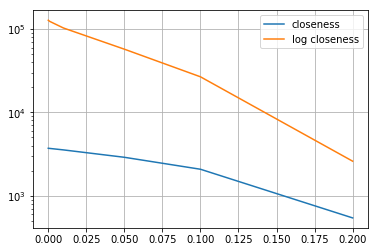

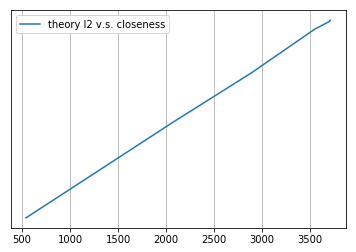

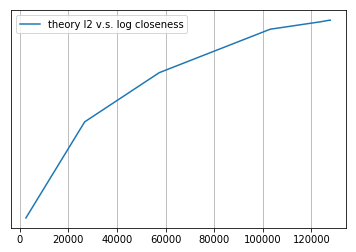

noise  1000.0 lamb  0.001


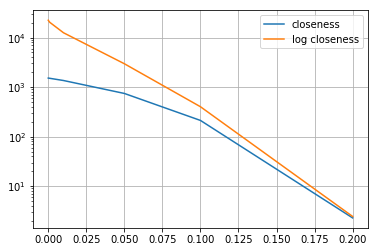

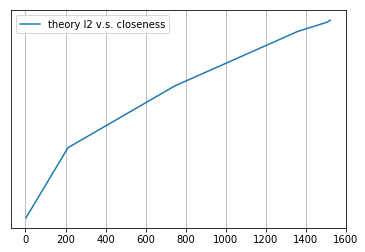

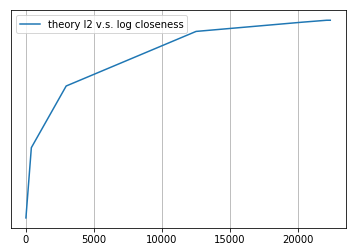

noise  1000.0 lamb  0.01


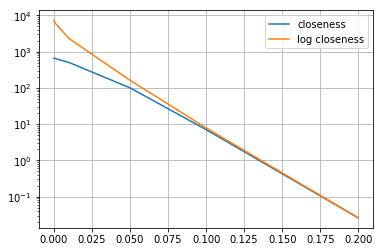

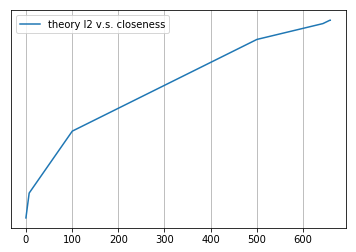

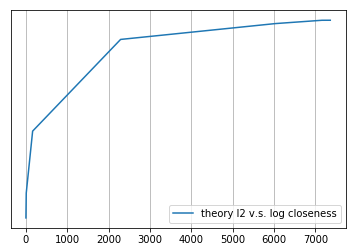

noise  1000.0 lamb  0.1


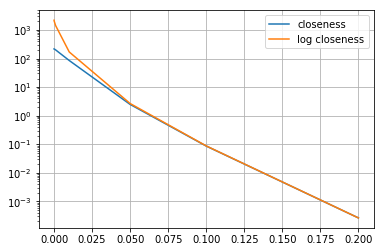

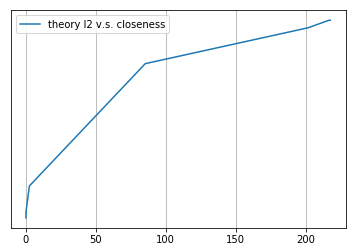

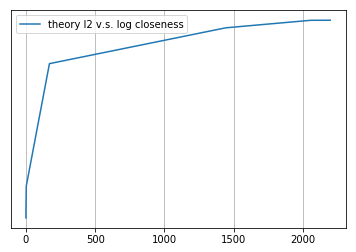

noise  1000.0 lamb  1.0


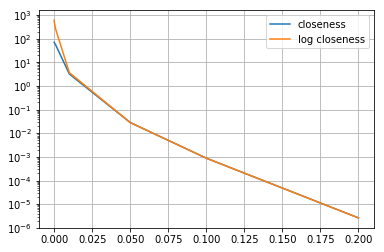

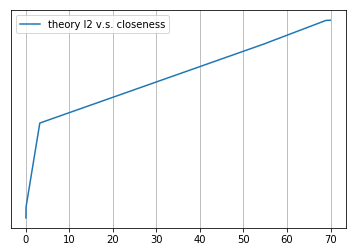

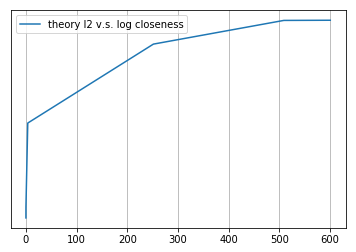

noise  1000.0 lamb  10.0


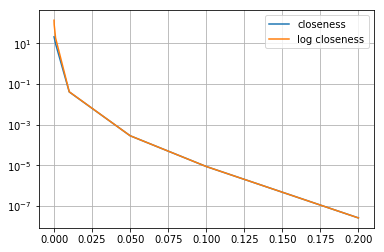

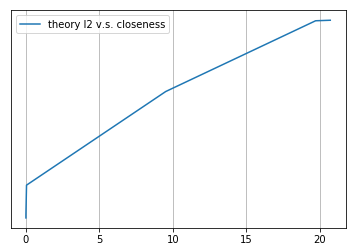

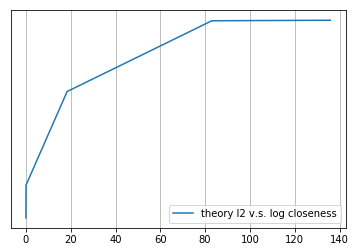

noise  10000.0 lamb  1e-06


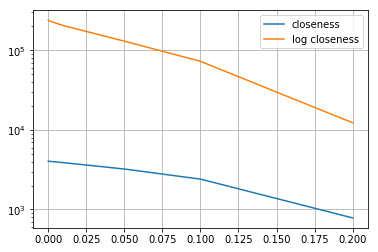

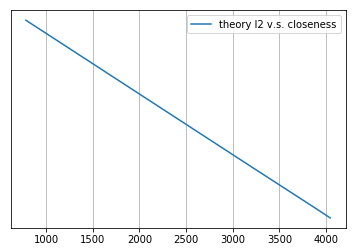

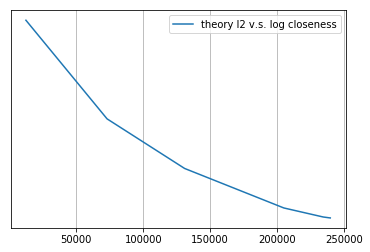

noise  10000.0 lamb  1e-05


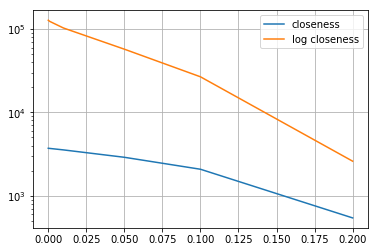

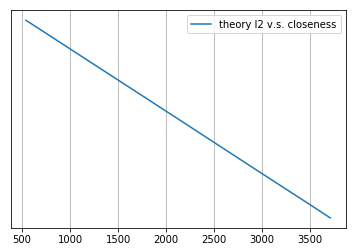

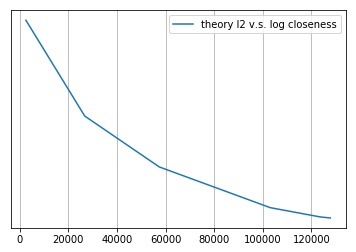

noise  10000.0 lamb  0.001


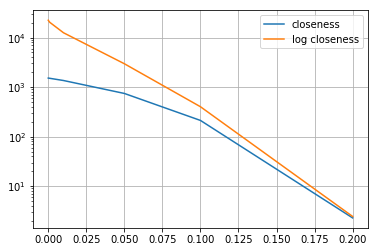

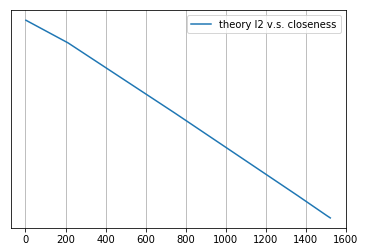

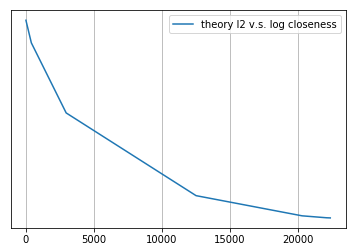

noise  10000.0 lamb  0.01


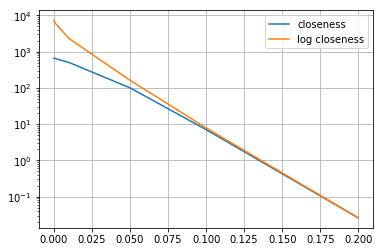

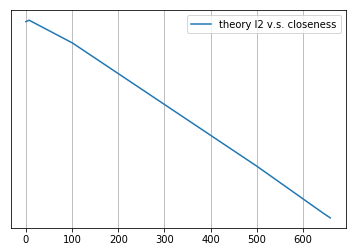

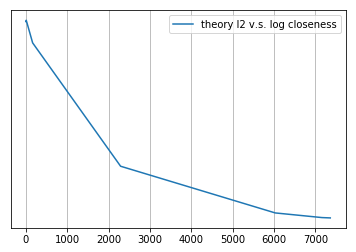

noise  10000.0 lamb  0.1


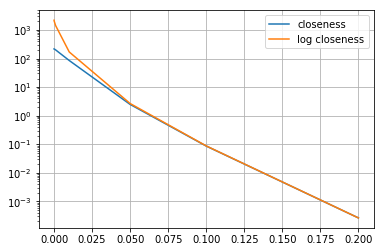

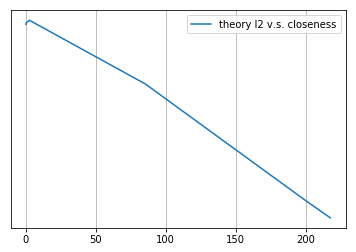

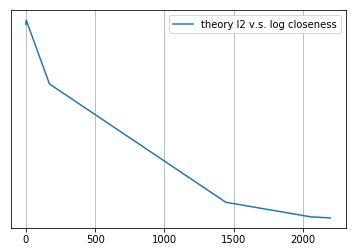

noise  10000.0 lamb  1.0


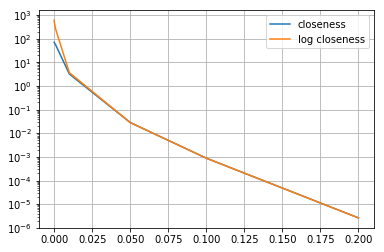

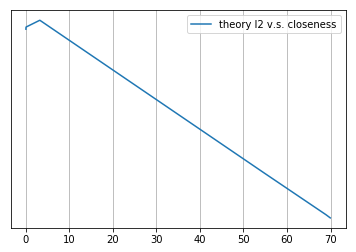

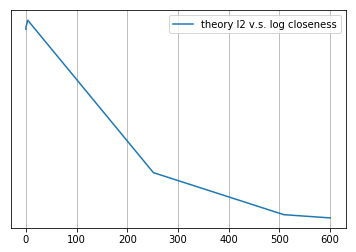

noise  10000.0 lamb  10.0


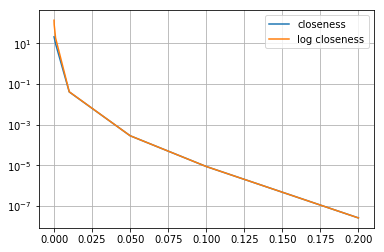

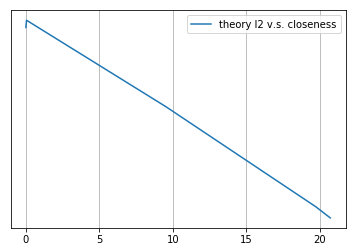

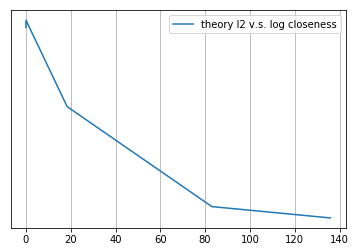

noise  100000.0 lamb  1e-06


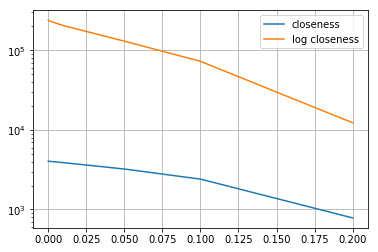

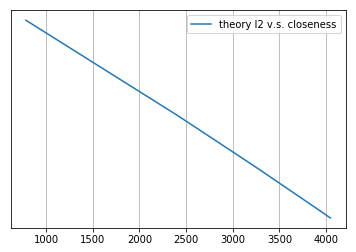

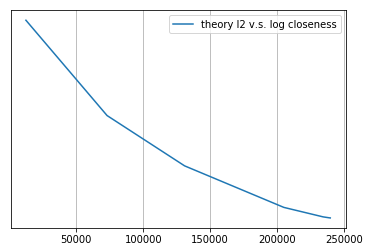

noise  100000.0 lamb  1e-05


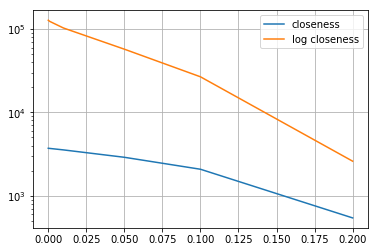

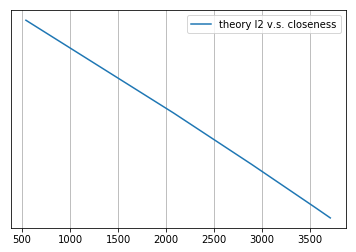

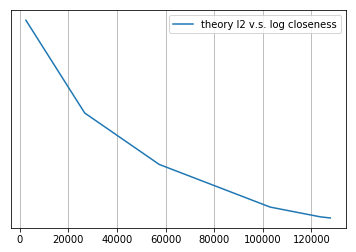

noise  100000.0 lamb  0.001


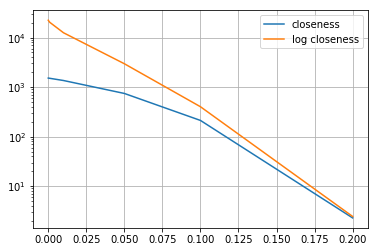

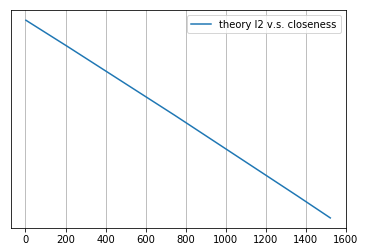

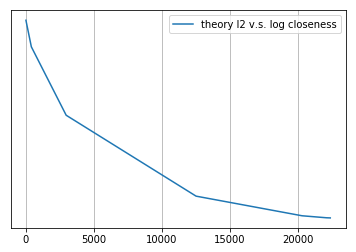

noise  100000.0 lamb  0.01


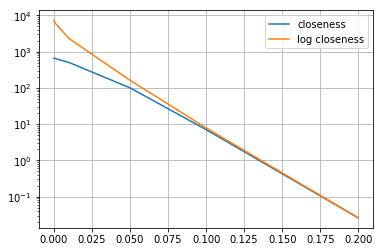

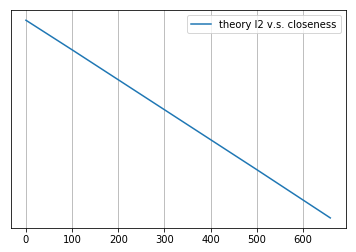

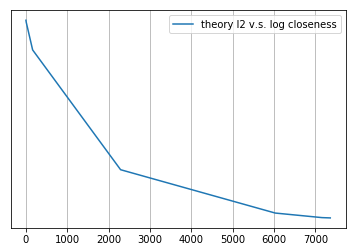

noise  100000.0 lamb  0.1


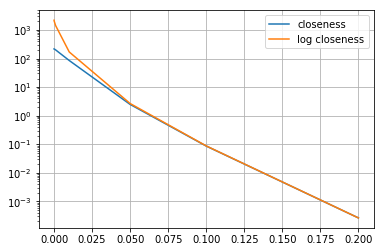

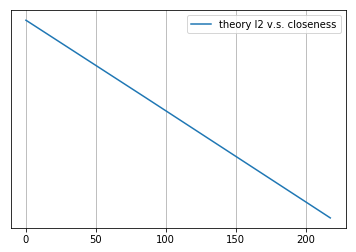

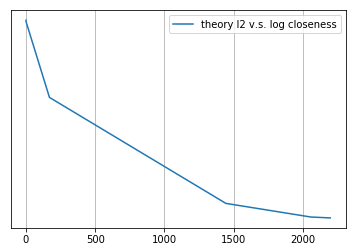

noise  100000.0 lamb  1.0


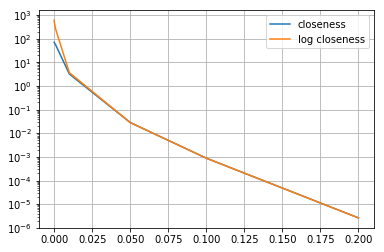

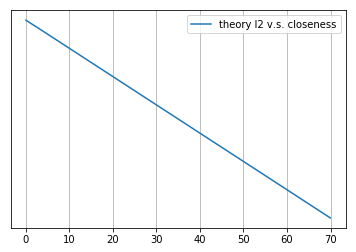

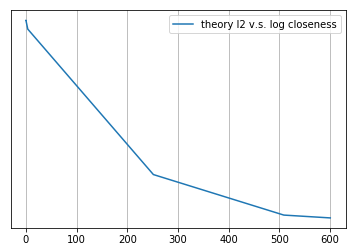

noise  100000.0 lamb  10.0


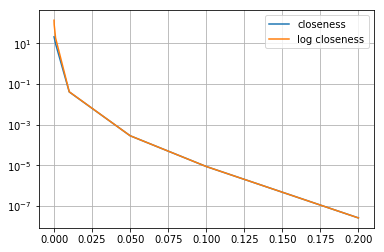

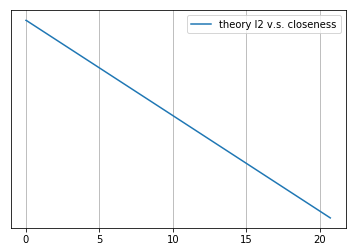

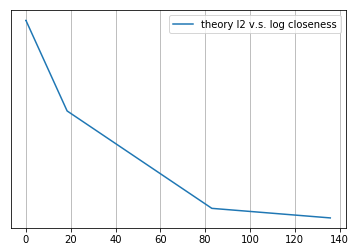

In [8]:
keep_perc_list = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
lamb_list = [1e-6, 1e-5, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
noise_list = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
lamb = 1e-2
noise = 1e0
for noise in noise_list:
    for lamb in lamb_list:
        print "noise ", noise, "lamb ", lamb
        closeness_list = []
        log_closeness_list = []
        theory_l2_list = []
        for keep_perc in keep_perc_list:
            S_cut = S_baseline.copy()
            S_cut[int(keep_perc * dim):] = 0.0
        #     print int(keep_perc * dim)
            closeness_list.append(get_closeness(S_cut, S_baseline, lamb) )
            log_closeness_list.append(get_log_closeness(S_cut, S_baseline, lamb) )
            theory_l2_list.append(expected_loss(lamb, U, S_cut, Y, noise) )
        plt.figure()
        plt.semilogy(keep_perc_list, closeness_list, label="closeness")
        plt.semilogy(keep_perc_list, log_closeness_list, label="log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
        plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        # plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
        # plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()
        # print closeness_list
        # print log_closeness_list
        # print theory_l2_list
        # print len(closeness_list)
        # print len(log_closeness_list)
        # print len(theory_l2_list)

### bump up

In [ ]:
keep_perc_list = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
lamb_list = [1e-6, 1e-5, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
noise_list = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
lamb = 1e-2
noise = 1e0
for noise in noise_list:
    for lamb in lamb_list:
        print "noise ", noise, "lamb ", lamb
        closeness_list = []
        log_closeness_list = []
        theory_l2_list = []
        for keep_perc in keep_perc_list:
            S_cut = S_baseline.copy()
            S_cut[int(keep_perc * dim):] = 0.0
        #     print int(keep_perc * dim)
            closeness_list.append(get_closeness(S_cut, S_baseline, lamb) )
            log_closeness_list.append(get_log_closeness(S_cut, S_baseline, lamb) )
            theory_l2_list.append(expected_loss(lamb, U, S_cut, Y, noise) )
        plt.figure()
        plt.semilogy(keep_perc_list, closeness_list, label="closeness")
        plt.semilogy(keep_perc_list, log_closeness_list, label="log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
        plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        # plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()

        plt.figure()
        # plt.semilogy(closeness_list, theory_l2_list, label="theory l2 v.s. closeness")
        plt.semilogy(log_closeness_list, theory_l2_list, label="theory l2 v.s. log closeness")
        # plt.semilogy(keep_perc_list, theory_l2_list, label="theory l2")
        plt.grid()
        plt.legend()
        plt.show()
        # print closeness_list
        # print log_closeness_list
        # print theory_l2_list
        # print len(closeness_list)
        # print len(log_closeness_list)
        # print len(theory_l2_list)